# Montu Python 
## Astronomical ephemerides for the Ancient World
## Test file: comparison between ephemerides computation packages


The purpose of this notebook is to compare different packages for computing ephemerides and other properties of interest in archeoastronomy. For this purpose we will choose a particular planet, Mars, and star, Aldebaran and compare how their position are computed and how they are compared. 

We will choose a dummy place and a given year to perform our studies:

In [42]:
# Near to Aswan
lat0 = 24.0 # deg
lon0 = 33.0 # deg
height0 = 0.0 # km

# Date
year0 = -2500 # 2501 b.c.e.

In [43]:
import numpy as np
import pandas as pd
np.set_printoptions(precision=17)
pd.set_option("display.precision", 17)

## MontuPython Legacy

We will start with the way we compute it with the legacy code in 

In [44]:
from montu.__legacy import *
%load_ext autoreload
%autoreload 2

Montu.load_kernels(verbose=True)
allstars=Stars()
LEGACY,MAIN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading local kernel frame.tk
Loading local kernel pck00011.tpc
Loading local kernel earth_assoc_itrf93.tf


(True, False)

In [45]:
# Examples
earth = PlanetaryBody(id='399')
mars = PlanetaryBody(id='499')

# Time of observations
mtime = MonTime(f'{year0}-01-01 12:00:00.00',scale='utc')
print("Date = ",mtime.datestr)
print("Time [jd] = ",mtime.jd)
print("Time [et] = ",mtime.et)
print("Time [deltat] = ",mtime.deltat)

# Observing location
medellin = ObservingSite(location=dict(lon=lon0*u.deg,lat=lat0*u.deg,height=height0*u.km),
                         onplanet = earth)
medellin.update_site(mtime)

# Calculate ephemerides
mars.calculate_ephemerides(location=medellin,epochs=mtime,verbose=1)

Date =  -2500-01-01 12:00:00.00
Time [jd] =  807954.0004766849
Time [et] =  -142006262358.81442
Time [deltat] =  41.18559848182847
Retrieving position for object 399
Retrieving position for object 499
	Correcting id to 4
Planet 399 position w.r.t. SSB =  [-1.4254576667837119e+08  4.0940727342393786e+07  5.5869117557443678e+05] [ -8.661300494627447   -28.635203303728886    -0.29070430034066064]
Body 499 position w.r.t. SSB =  [-2.4078773811193833e+08  2.9140777010788921e+07  8.5648619432074800e+06] [ -1.3712422329806413 -22.501801288223486   -0.3596977246792097]
Coordinates @ J2000:  12d32m28.06957961s 1d31m40.30527964s
Coordinates @ Epoch using astropy :  8d32m54.55778425s 24d02m40.98734489s
Coordinates @ Epoch using SPICE :  8d32m56.18104171s 24d02m36.36112028s
Coordinates @ Epoch:  8d32m56.18104171s 24d02m36.36112028s
AltAz @ Epoch:  6.085786433046532 -41.712473855864985
AltAz @ Epoch:  (6.0, 5, 8.831158967513986) (-41.0, 42, 44.90588111394686)
AltAz @ Epoch (SPICE):  (16.0, 52, 36.5

The same configuration produce in Stellarium using the following coordinates result (using JD 807954):

RAVDec (J2000.0): $12 \mathrm{~h} 31 \mathrm{~m} 52.74 \mathrm{~s} /+1^{\circ} 36^{\prime} 38.7^{\prime \prime}$ RADEec (on date): $8 \mathrm{~h} 32 \mathrm{~m} 13.91 \mathrm{~s} /+24^{\circ} 06.12 .2^{\prime \prime}$ HA/Dec: $12 \mathrm{~h} 20 \mathrm{m04} .18 \mathrm{~s} /+24^{\circ} 06^{\prime} 12.2^{\prime \prime}$ Az./Alt: $+6^{\circ} 07^{\prime} 59.8^{\prime \prime} /-41^{\circ} 39^{\circ} 04.1^{\prime \prime}$

In [46]:
mtime.datespice

'2501 B.C. 01-01 12:00:00.0'

## Horizons

Documentation:
- Short description and tutorial: https://astroquery.readthedocs.io/en/latest/api/astroquery.jplhorizons.HorizonsClass.html

The same calculations obtained using AstroQuery gives:

In [47]:
mtime.jd

807954.0004766849

In [48]:
from astroquery.jplhorizons import Horizons
mtime = MonTime(f'{year0}-01-01 12:00:00.00',scale='utc')
query_mars = Horizons(id='4',location='@SSB',epochs=mtime.jd)
query_earth = Horizons(id='399',location='@SSB',epochs=mtime.jd)

### Positions of Earth and Mars

We want to compare:

In [49]:
mars.X_SSBJ2000,mars.P_SSBJ2000

(array([-2.4078773811193833e+08,  2.3329233757438272e+07,
         1.9449642597989570e+07, -1.3712422329806413e+00,
        -2.0501919508272181e+01, -9.2807187299348861e+00]),
 array([-1.4254576667837119e+08,  3.7340148357847326e+07,
         1.6797875215867225e+07, -8.6613004946274472e+00,
        -2.6156649845068738e+01, -1.1657145710618343e+01]))

In [50]:
mars_position = query_mars.vectors().to_pandas()
mars_position[['x','y','z']]*=AU
mars_position[['vx','vy','vz']]*=AU/DAY
mars_position

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
0,Mars Barycenter (4),807954.0004766850033775,B.C. 2501-Jan-22 12:00:41.1856,-2.40787738111938328e+08,2.91407770107889213e+07,8.56486194320748001e+06,-1.3712422329806413,-22.50180128822347925,-0.35969772467920974,0.00936974794851816,1.62232156679639306,-0.0007820295529553


It coincides until the last figure.

In [51]:
earth_position = query_earth.vectors().to_pandas()
earth_position[['x','y','z']]*=AU
earth_position[['vx','vy','vz']]*=AU/DAY
earth_position

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
0,Earth (399),807954.0004766850033775,B.C. 2501-Jan-22 12:00:41.1856,-1.42545766678371191e+08,4.09407273423937932e+07,558691.17557443690020591,-8.66130049462744722,-28.63520330372889333,-0.29070430034066058,0.0057257838708019,0.99138874508208474,0.00024192075806106


### Ephemerides

We want to compare against the results produced by `MontyPython.legacy`

In [52]:
print("RA,dec@J2000:",mars.eq_J2000.ra/15,mars.eq_J2000.dec)
print("RA,dec@Epoch:",mars.eq_epoch.ra/15,mars.eq_epoch.dec)
print("AltAz @ Epoch: ",Montu.dec2hex(mars.az_epoch.az.value),Montu.dec2hex(mars.az_epoch.alt.value))

RA,dec@J2000: 12d32m28.06957961s 1d31m40.30527964s
RA,dec@Epoch: 8d32m56.18104171s 24d02m36.36112028s
AltAz @ Epoch:  (6.0, 5, 8.831158967513986) (-41.0, 42, 44.90588111394686)


Astroquery:

In [14]:
mtime.jd

807954.0004766849

In [15]:
mtime = MonTime(f'{year0}-01-01 12:00:00.00',scale='tt')
query_mars = Horizons(id='4',location=dict(lon=lon0,lat=lat0,elevation=height0),epochs=mtime.jd)
ephemerides = query_mars.ephemerides().to_pandas()
ephemerides

,targetname,datetime_str,datetime_jd,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,...,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
0,Mars Barycenter (4),b2501-Jan-22 12:00:00.000,807954.0,*,,187.95477999999999952,1.61853000000000002,128.03867999999999938,24.1082099999999997,-34.81450000000000244,...,<NA>,<NA>,<NA>,<NA>,<NA>,217.79449999999999932,-11.66220730899999936,13.37079999999999913,180.08949999999998681,3.35170000000000012


In [16]:
ephemerides = ephemerides.loc[0]
print(mtime.jd)
print("RAJ2000 = ",Montu.dec2hex(ephemerides.RA/15))
print("DecJ2000 = ",Montu.dec2hex(ephemerides.DEC))
print("RA = ",Montu.dec2hex(ephemerides.RA_app/15))
print("Dec = ",Montu.dec2hex(ephemerides.DEC_app))
print("Az = ",Montu.dec2hex(ephemerides.AZ))
print("Alt = ",Montu.dec2hex(ephemerides.EL))


807953.9999999995
RAJ2000 =  (12.0, 31, 49.14719999999818)
DecJ2000 =  (1.0, 37, 6.7080000000001405)
RA =  (8.0, 32, 9.283199999998999)
Dec =  (24.0, 6, 29.555999999998903)
Az =  (6.0, 11, 33.727199999998945)
Alt =  (-41.0, 38, 29.317200000006665)


Recall Stellarium: 

The same configuration produce in Stellarium the following result:

RAVDec (J2000.0): $12 \mathrm{~h} 31 \mathrm{~m} 52.74 \mathrm{~s} /+1^{\circ} 36^{\prime} 38.7^{\prime \prime}$ RADEec (on date): $8 \mathrm{~h} 32 \mathrm{~m} 13.91 \mathrm{~s} /+24^{\circ} 06.12 .2^{\prime \prime}$ HA/Dec: $12 \mathrm{~h} 20 \mathrm{m04} .18 \mathrm{~s} /+24^{\circ} 06^{\prime} 12.2^{\prime \prime}$ Az./Alt: $+6^{\circ} 07^{\prime} 59.8^{\prime \prime} /-41^{\circ} 39^{\circ} 04.1^{\prime \prime}$

Stellarium and `Horizons` coincide but not `MontuPython.legacy`

## PyEphem

Documentation:
- Quick reference: https://rhodesmill.org/pyephem/quick.html
- Detailed tutorial: https://rhodesmill.org/pyephem/tutorial

In [53]:
import ephem

Let's compute mars coordinates at the epoch:

In [54]:
# Note that for PyEphem -2500 (2501 b.c.e.) is -2501 and that the date must be given in Julian Calendar
date = f'{year0-1}-01-22 12:00:00.00'
marseph = ephem.Mars(date)
marseph.compute(date)
print("PyEphem: ",marseph.ra, marseph.dec)

# Compared to HORIZONS
print("Horizons: ",Montu.dec2hex(ephemerides.RA_app/15),Montu.dec2hex(ephemerides.DEC_app))


PyEphem:  8:32:09.64 24:06:50.8
Horizons:  (8.0, 32, 9.283199999998999) (24.0, 6, 29.555999999998903)


In pretty good agreement. Now we want the position of Mars with respect to the horizon of a given site:

In [72]:
adate = f'{year0-1}-01-22 12:00:00.00'
d = ephem.Date(date)
marseph = ephem.Mars()
marseph.compute(d)
site = ephem.Observer()
site.lat = f'{lat0}'
site.lon = f'{lon0}'
site.elevation = 0
site.temp = 0
site.pressure = 0
site.date = d
marseph.compute(site)
print("Using PyEphem: ",Montu.dec2hex(float(marseph.az)*RAD), Montu.dec2hex(float(marseph.alt)*RAD))
print("Using Horizons: ",Montu.dec2hex(ephemerides.AZ),Montu.dec2hex(ephemerides.EL))

Using PyEphem:  (6.0, 11, 23.905564366115826) (-41.0, 38, 18.685147982311605)
Using Horizons:  (6.0, 11, 33.727199999998945) (-41.0, 38, 29.317200000006665)


In [73]:
mtime = MonTime('2000-01-01 12:00:00.00',scale='utc')

In [67]:
print(ephem.Date(0))

1899/12/31 12:00:00


In [63]:
Montu.dec2hex(marseph.ra*RAD/15),Montu.dec2hex(marseph.dec*RAD)

((8.0, 32, 9.71805413547699), (24.0, 6, 40.9201083707282))

In [65]:
marseph.phase

98.64616394042969

## PyPlanets

Documentation:

- Information in PyPI: https://pypi.org/project/pyplanets/
- Repository in GitHub: https://github.com/martin5f/pyplanets

In [22]:
from pyplanets.core.epoch import Epoch
from pyplanets.core.constellation import Constellation
from pyplanets.planets.earth import Earth
from pyplanets.planets.mars import Mars

In [23]:
epoch = Epoch(year0, 1, 22, 12, 0, 0)
print("Julian day = ",epoch.jde)
marspy = Mars(epoch)
earthpy = Earth(epoch)
constellation = Constellation(earthpy, marspy)
ra, dec, elon = constellation.geocentric_position()
print("PyAstro: ",Montu.dec2hex(float(ra)/15), Montu.dec2hex(float(dec)))
# Compared to HORIZONS
print("Horizons: ",Montu.dec2hex(ephemerides.RA_app/15),Montu.dec2hex(ephemerides.DEC_app))


Julian day =  <bound method Epoch.jde of Epoch(807954.0)>
[2023-10-09 20:04:03] DEBUG:pyplanets.core.constellation:Iteration-# / delta = 1 / 0.663525082983452
[2023-10-09 20:04:03] DEBUG:pyplanets.core.constellation:Iteration-# / delta = 2 / 0.6635828000444294
[2023-10-09 20:04:03] DEBUG:pyplanets.core.constellation:Iteration-# / delta = 3 / 0.663582799274333
[2023-10-09 20:04:03] DEBUG:pyplanets.core.constellation:Iteration-# / delta = 4 / 0.663582799274333
[2023-10-09 20:04:03] DEBUG:pyplanets.core.constellation:Total iterations / tau[min] = 4 / 5.518849825114756
PyAstro:  (8.0, 32, 54.63169135999621) (24.0, 2, 53.295730985381624)
Horizons:  (8.0, 32, 9.283199999998999) (24.0, 6, 29.555999999998903)


### Delta-t

One of the great pieces of code taht has PyPlanets is a routine to compute $\Delta t = TT - UTC$ using a detailed model developed by Espenack et al. (https://eclipse.gsfc.nasa.gov/LEcat5/deltatpoly.html)

In [25]:
Epoch.tt2ut(-2500,1)

59699.68000000001

Here is the problem with the `MontuPython.legacy`: we will not taking into account this huge difference.  Let's consider it:

In [26]:
from copy import deepcopy
# Examples
earth = PlanetaryBody(id='399')
mars = PlanetaryBody(id='499')

# Time of observations
mtime = MonTime(f'{year0}-01-01 12:00:00.00',scale='utc')

print("Date = ",mtime.datestr)
print("Time [jd, UTC] = ",mtime.jd)
print("Time [et] = ",mtime.et)
print("Time [deltat] = ",mtime.deltat)

# Observing location
medellin = ObservingSite(location=dict(lon=lon0*u.deg,lat=lat0*u.deg,height=height0*u.km),
                         onplanet = earth)


# Time correction
astrotime = deepcopy(mtime.astrotime)
mtime = MonTime(mtime.et+Epoch.tt2ut(-2500,1.01),format='et')
mtime.astrotime = deepcopy(astrotime)
print("Time [jd, TT]: ",mtime.jd)
print("Time [et, TT]: ",mtime.et)

Date =  -2500-01-01 12:00:00.00
Time [jd, UTC] =  807954.0004766849
Time [et] =  -142006262358.81442
Time [deltat] =  41.18559848182847
Time [jd, TT]:  807954.6909685181
Time [et, TT]:  -142006202700.32004


Now we can compute with `MontuPython`:

In [27]:
medellin.update_site(mtime)

# Calculate ephemerides

mars.calculate_ephemerides(location=medellin,epochs=mtime,verbose=1)
print("RAJ2000 = ",Montu.dec2hex(ephemerides.RA/15))
print("DecJ2000 = ",Montu.dec2hex(ephemerides.DEC))
print("RA = ",Montu.dec2hex(ephemerides.RA_app/15))
print("Dec = ",Montu.dec2hex(ephemerides.DEC_app))
print("Az = ",Montu.dec2hex(ephemerides.AZ))
print("Alt = ",Montu.dec2hex(ephemerides.EL))

Retrieving position for object 399
Retrieving position for object 499
	Correcting id to 4
Planet 399 position w.r.t. SSB =  [-1.4305228111864543e+08  3.9229527538835682e+07  5.4131266942912526e+05] [ -8.318991284868057  -28.730667414660573   -0.2918878627075152]
Body 499 position w.r.t. SSB =  [-2.4086558453273386e+08  2.7797890106387239e+07  8.5432623238092214e+06] [ -1.2384638704523976 -22.51721308912209    -0.3644098251815677]
Coordinates @ J2000:  12d31m48.75374474s 1d37m12.18389356s
Coordinates @ Epoch using astropy :  8d32m08.16082627s 24d06m33.21954321s
Coordinates @ Epoch using SPICE :  8d32m09.7958861s 24d06m28.55484868s
Coordinates @ Epoch:  8d32m09.7958861s 24d06m28.55484868s
AltAz @ Epoch:  6.311347909819912 -41.62927051501452
AltAz @ Epoch:  (6.0, 18, 40.85247535168442) (-41.0, 37, 45.3738540522653)
AltAz @ Epoch (SPICE):  (290.0, 56, 21.168534290850403) (15.0, 6, 49.46209078300413)
RAJ2000 =  (12.0, 31, 49.14719999999818)
DecJ2000 =  (1.0, 37, 6.7080000000001405)
RA =  (8

Now they really coincide!

## PyMeeus

This is the package that implements the original algorithms of Meeus.

Documentation:

- https://pymeeus.readthedocs.io/en/latest/

`PyMeeus` uses an old routine to compute $\Delta t$. It could be interesting to compare:

In [28]:
from pymeeus.Epoch import Epoch as Epochmeeus

In [29]:
mydate = Epochmeeus(-2500, 1, 1.5)

In [30]:
mydate

Epoch(807933.0)

In [32]:
Epochmeeus(mtime.jd).get_full_date()

(-2500, 1, 23, 4, 34, 59.679967761039734)

In [33]:
Epoch.tt2ut(year0,1),Epochmeeus.tt2ut(year0,1)

(59699.68000000001, 59699.68000000001)

## Graphics

In [34]:
from pyplanets.core.coordinates import mean_obliquity
import matplotlib.pyplot as plt

In [36]:
ys = np.arange(-4000,3000,100)
es = [mean_obliquity(int(y), 1, 1) for y in ys]

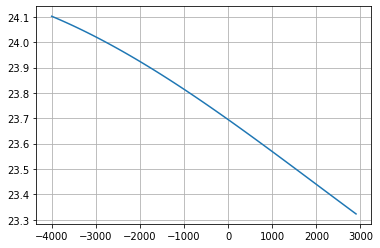

In [38]:
plt.plot(ys,es)
plt.grid()